# Sesi 8
Advanced Visualization

In [1]:
import numpy as np
import pandas as pd

In [3]:
df_can = pd.read_excel('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Canada.xlsx',
                          sheet_name='Canada by Citizenship',
                          skiprows=range(20),
                          skipfooter=2)

print('Data donwloaded and read into a dataframe!')

Data donwloaded and read into a dataframe!


In [4]:
Data donwloaded and read into a dataframe!

SyntaxError: invalid syntax (<ipython-input-4-f6c23066a254>, line 1)

In [5]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [8]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [9]:
df_can.set_index('Country', inplace=True)

In [12]:
df_can.columns=list(map(str,df_can.columns))

In [13]:
df_can['Total'] = df_can.sum(axis=1)

In [14]:
years=list(map(str, range(1980, 2014)))

In [15]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

## Word Cloud

In [20]:
!pip install wordcloud

In [21]:
from wordcloud import WordCloud, STOPWORDS
# stopwords adalah kata2 sering muncul tapi gada arti, ex: the, and, a, is, dkk

In [22]:
alice_novel = open('dataset/alice_novel.txt', 'r').read()

In [23]:
alice_novel

'ï»¿Project Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what

In [24]:
stopwords = set(STOPWORDS)

In [26]:
# bikin object wordcloud
alice_wc=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=2000)

# bikin wordcloud
alice_wc.generate(alice_novel)

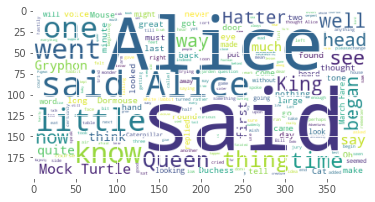

In [28]:
# tampilin visualisasi gambar
plt.imshow(alice_wc)

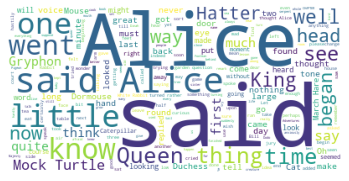

In [31]:
plt.imshow(alice_wc)

# hilangkan grid
plt.axis('off')
plt.show()

(-0.5, 399.5, 199.5, -0.5)

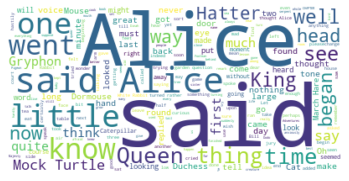

In [33]:
# interpolasi untuk smoothing gambar
plt.imshow(alice_wc, interpolation='bilinear')

plt.axis('off')

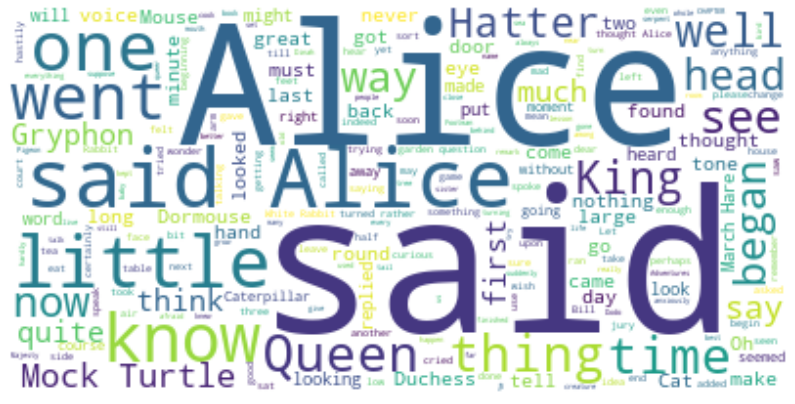

In [35]:
fig=plt.figure()

# setting besar gambar
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
# tambahin stopwords secara manual
stopwords.add('said')

In [37]:
# regenerate var
alice_wc.generate(alice_novel)

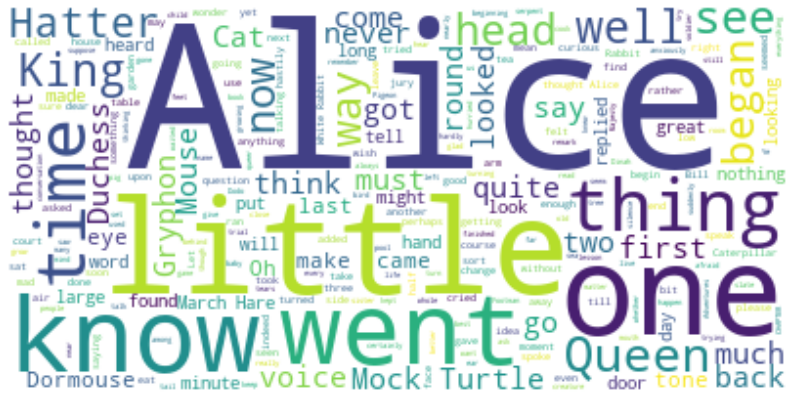

In [38]:
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plots

In [39]:
!pip install seaborn

In [41]:
import seaborn as sns

In [42]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

In [43]:
df_tot

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432


In [45]:
df_tot.index= map (int, df_tot.index)

In [46]:
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']

In [47]:
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


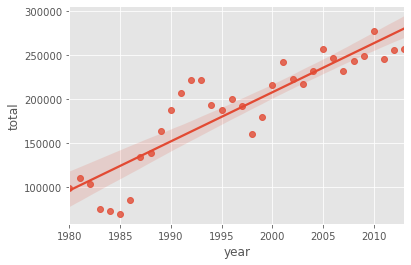

In [48]:
ax=sns.regplot(x='year', y='total', data=df_tot)

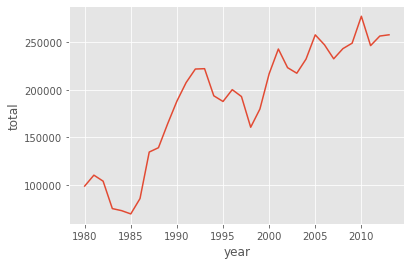

In [49]:
ax=sns.lineplot(x='year', y='total', data=df_tot)

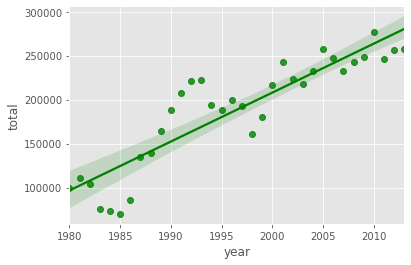

In [50]:
# ubah warna
ax=sns.regplot(x='year', y='total', data=df_tot, color='green')

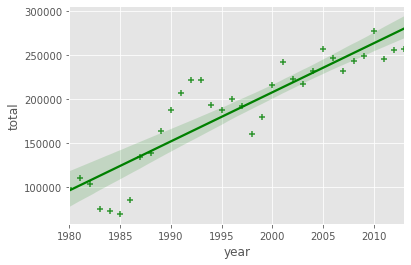

In [51]:
ax=sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

## FOLIUM

In [52]:
!pip install folium

In [53]:
import folium

In [54]:
world_map = folium.Map()

In [55]:
world_map

In [60]:
# untuk milih lokasi dan zoom berapa kali
world_map = folium.Map(location=[-7.9771351,112.6340638], zoom_start=15)

world_map

In [61]:
world_map = folium.Map(location=[-6.2607187,106.7816162], zoom_start=15)

In [62]:
world_map

In [64]:
world_map = folium.Map(location=[-6.2607187,106.7816162], 
                       zoom_start=15,
                      tiles='Stamen Toner')

In [65]:
world_map

In [69]:
world_map = folium.Map(location=[-6.2607187,106.7816162], 
                       zoom_start=12,
                      tiles='Stamen Terrain')
world_map

## Maps with Marker

In [70]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [72]:
df_incidents.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168


In [1]:
df_incidents=df_incidents.iloc[0:100,:]

NameError: name 'df_incidents' is not defined

In [74]:
df_incidents.shape

(100, 13)

In [80]:
sanfran_map = folium.Map(location=[37.77,-122.42], zoom_start=12)

In [81]:
sanfran_map

In [83]:
# tambahin marker di maps
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6))
    
sanfran_map.add_child(incidents)

In [84]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6))

latitudes = list(df_incidents.Y)
longitudes= list(df_incidents.X)
labels= list(df_incidents.Category)

for lat, lng, label in zip (latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)
    
sanfran_map.add_child(incidents)

In [86]:
# tambahin label di maps
incidents = folium.map.FeatureGroup()

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    incidents.add_child(
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=label))
    
sanfran_map.add_child(incidents)

In [88]:
# bikin cluster untuk grouping
from folium import plugins

sanfran_map = folium.Map(location=[37.77,-122.42], zoom_start=12)

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label in zip(df_incidents.Y, 
                           df_incidents.X, 
                           df_incidents.Category):
    incidents.add_child(
    folium.Marker(
        [lat, lng],
       icon=None,
        popup=label))
    
sanfran_map.add_child(incidents)